In [1]:
import numpy as np
import pandas as pd


In [2]:
pip install abc_analysis

In [3]:
from abc_analysis import abc_analysis

In [4]:
#df=pd.read_excel("abc_analysis.xlsx",usecols=[0,1,2,11])
df=pd.read_excel("abc_analysis.xlsx")

In [5]:
df

,typ,icode,name,ss1,SS2,ss3,SS4,sales
0,2,1,ARISHINA,82,55,600,56,27239.5
1,2,2,KUMKUMA,28,55,1362,56,51971.0
2,2,4,CHAHAPUDI,181,219,0,0,632.0
3,2,6,KASTURI BAR SOAP,29,21,186,538,368.0
4,2,8,YARANA (SPL),7,0,0,0,54.0
...,...,...,...,...,...,...,...,...
22321,281,100063,SHENGA ODAKALU 250GM,181,242,0,0,280.0
22322,281,100320,JADDAKKI(RED RICE)1KG,181,44,0,0,414.0
22323,281,101041,BESAN 500GM*2,181,43,0,0,43000.0
22324,281,108406,TOBACCO(STICK),181,0,0,0,2391.2


In [6]:
df.sales.isnull().sum()

0

In [7]:
# remove gold category
#df=df[df["typ"]!=236]

In [8]:
#datatoremove=[77,161,78,76,75,172,2,6,14,10,167,157,44,17,203,134,52,80,207,166,193,219,185,327,189,215,323,162]

In [9]:
#df=df[~df.typ.isin(datatoremove)]

In [10]:
#df.sort_values(by="sales")

In [11]:
df["sales"].dropna(inplace=True)

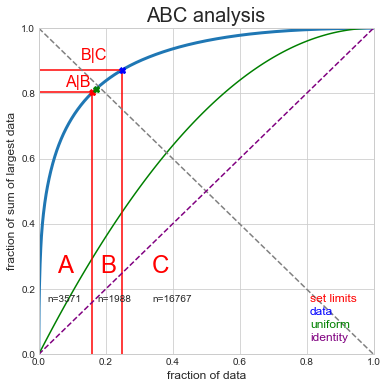

In [12]:
abc=abc_analysis(df["sales"],True)

In [13]:
abc


{'ABLimit': 15600.0,
 'BCLimit': 9311.2,
 'ABexchanged': True,
 'Aind': [0,
  1,
  6,
  7,
  8,
  9,
  11,
  12,
  14,
  15,
  16,
  17,
  18,
  19,
  21,
  22,
  23,
  25,
  26,
  27,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  37,
  38,
  40,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  50,
  51,
  52,
  53,
  55,
  56,
  57,
  58,
  59,
  61,
  62,
  63,
  64,
  65,
  68,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  81,
  83,
  84,
  85,
  86,
  88,
  89,
  90,
  91,
  93,
  94,
  96,
  97,
  100,
  104,
  105,
  106,
  108,
  110,
  113,
  116,
  117,
  120,
  121,
  122,
  125,
  126,
  127,
  128,
  129,
  134,
  135,
  136,
  141,
  142,
  143,
  144,
  145,
  146,
  151,
  156,
  161,
  163,
  165,
  167,
  168,
  169,
  170,
  171,
  172,
  173,
  174,
  175,
  176,
  178,
  182,
  183,
  184,
  185,
  187,
  188,
  190,
  191,
  192,
  193,
  194,
  198,
  199,
  201,
  202,
  203,
  204,
  209,
  214,
  215,
  216,
  217,
  220,
  221,
  223,
  224,
  225,
  

In [14]:
a_index=abc["Aind"]
b_index=abc["Bind"]
c_index=abc["Cind"]

cond_list=[df.index.isin(a_index),
           df.index.isin(b_index),
           df.index.isin(c_index)
          ]
choice_list=['A','B','C']

df['abc']=np.select(cond_list,choice_list)
df.sort_values(by=["sales"],ascending=False)


,typ,icode,name,ss1,SS2,ss3,SS4,sales,abc
46,2,135,POMOIL(RUCHIGOLD)1LI,39,166,235,1567,6677255.43,A
22097,281,3,SAKKARE SMALL,181,241,0,0,4204477.05,A
3206,2,29812,LAMP OIL UJWAL 1LTR,39,865,435,873,3589584.54,A
22239,281,5169,SAKKARE(MEDIUM),181,241,0,0,3574823.77,A
889,2,2910,SURYAKANTIENNE(EMAMI)1LI,39,364,320,864,3375449.52,A
...,...,...,...,...,...,...,...,...,...
21260,210,89542,SONY TV XSTREAM,431,0,0,0,1.00,C
21876,210,108161,SONY HOME THEATRE SA-Z9R,431,0,0,0,1.00,C
3130,2,24414,PAPER CHART 3/-,24,25,0,0,1.00,C
20951,210,48259,USB CABLE,277,0,0,0,1.00,C


In [15]:
df["abc"].value_counts()

C    16767
A     3571
B     1988
Name: abc, dtype: int64

In [16]:
df["typ"].unique()

array([  2,  98, 134, 174, 210, 275, 281], dtype=int64)

In [17]:
df_final=df[df["abc"]=='A']

In [18]:
df_final

,typ,icode,name,ss1,SS2,ss3,SS4,sales,abc
0,2,1,ARISHINA,82,55,600,56,27239.50,A
1,2,2,KUMKUMA,28,55,1362,56,51971.00,A
6,2,25,HAMAM SOAP 100GM,808,185,188,535,142768.78,A
7,2,26,LUX SOAP 10/-,808,185,189,535,31366.88,A
8,2,27,REXONA SOAP,808,185,187,535,24821.90,A
...,...,...,...,...,...,...,...,...,...
22310,281,82056,COMPOSTABLE BAGS(K.G),0,0,0,0,17442.50,A
22311,281,95182,URAD DALL (DOUBLE GODHA) 1KG,181,242,0,0,28350.00,A
22312,281,96015,MASURU DALL 1 KG,181,242,55,0,21156.00,A
22323,281,101041,BESAN 500GM*2,181,43,0,0,43000.00,A


In [20]:
df.to_excel(r'C:\Users\Administrator\Desktop\TSS_PROJECTS\abc_analysis\final_webproducts.xlsx', index = False)

In [ ]:
df[df["abc"]=='A']